In [10]:
import os
import sys
import chess.pgn as pychess
from chess.pgn import read_game
from chess import square_name
from chess import SQUARE_NAMES, BB_SQUARES
import ChessFuncs
from ChessFuncs import end_board
import bz2
import time
from io import StringIO
from multiprocessing import Process
import time
from time import sleep
import time
import glob

In [195]:
paths = glob.glob('*PARSED*')
parsedpath = paths[0]

# Pandas create pivot

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [197]:
#create a DataFrame with the index set to chess square names, and an empty count column
check_df = pd.DataFrame(SQUARE_NAMES,columns=['king_square_name'])
check_df.index = check_df['king_square_name']
check_df['frequency'] = 0

stale_df = pd.DataFrame(SQUARE_NAMES,columns=['king_square_name'])
stale_df.index = stale_df['king_square_name']
stale_df['frequency'] = 0

3 pgn files
2.83 million games
684 thousand checkmates

CPU times: user 11.8 s, sys: 45.5 ms, total: 11.8 s
Wall time: 11.8 s


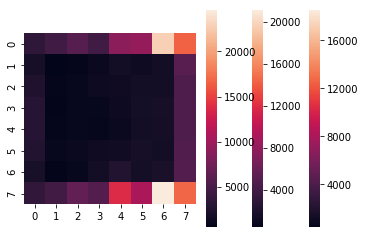

In [204]:
%%time
pgns = 0
games = 0
cm = 0

for path in paths:
    pgns += 1    
    with open(path,'r') as file: 
        
        # Populate the dataframe
        for line in file:
            games += 1
            result,king,queen = line.split(',')
            
            if result == '1' or result == '0': # if checkmate
                cm += 1
                king_square = square_name(int(king))                
                check_df.at[king_square,'frequency'] += 1 

#             else: # if stalemate
# #                 pass # this takes 6-10x longer
#                 king_square_white,king_square_black = [square_name(int(king)) for king in king.split('-')]
#                 stale_df.at[king_square_white,'frequency'] += 1 
#                 stale_df.at[king_square_black,'frequency'] += 1 

print(f"{pgns} pgn files")
print(f"{round(games/1000000,2)} million games")
print(f"{round(cm/1000)} thousand checkmates\n")        

In [184]:
def create_dataframe():
    check_df = pd.DataFrame(SQUARE_NAMES,columns=['king_square_name'])
    check_df.index = check_df['king_square_name']
    check_df['frequency'] = 0

    stale_df = pd.DataFrame(SQUARE_NAMES,columns=['king_square_name'])
    stale_df.index = stale_df['king_square_name']
    stale_df['frequency'] = 0
    
    return check_df

def populate_dataframe(csv_paths, dataframe):
    '''Takes the parsed pgn csv/txt files and sorts them into their equivalent spaces in a len=64 dataframe'''
    
    for path in csv_paths:
        with open(path,'r') as file: 
            for line in file:
                result,king,queen = line.split(',')

                if result == '1' or result == '0': # if checkmate
                    king_square = square_name(int(king))                
                    dataframe.at[king_square,'frequency'] += 1 

                else: # if stalemate
                    pass # this takes 6-10x longer
        #             king_square_white,king_square_black = [square_name(int(king)) for king in king.split('-')]
        #             stale_df.at[king_square_white,'frequency'] += 1 
        #             stale_df.at[king_square_black,'frequency'] += 1 
        
    return dataframe

if __name__ == '__main__':
    for path in paths: 
        check_df = create_dataframe()
        check_df = populate_dataframe(csv_paths=paths, dataframe=check_df)
        heatmap = create_heatmap(dataframe=check_df)

,king_square_name,frequency
king_square_name,,
a1,a1,9322
b1,b1,11704
c1,c1,15712
d1,d1,12449
e1,e1,24309


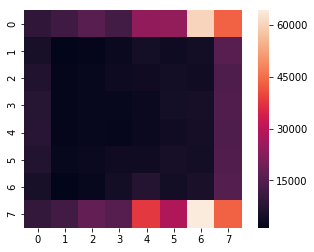

In [199]:
# Create & save the heatmap
#move the count col into an np.array, then reshape 8x8 to match a chessboard
checkmate_counts = np.array(check_df['frequency'])
checkmate_counts = checkmate_counts.reshape(8,8)

#create heatmap
heatmap = sns.heatmap(checkmate_counts, square=True)
heatmap = heatmap.get_figure()
heatmap.savefig("heatmap")

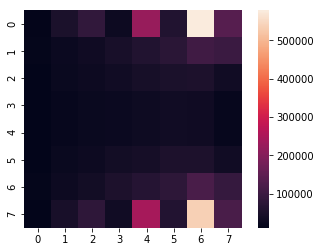

In [205]:
#move the count col into an np.array, then reshape 8x8 to match a chessboard
stalemate_counts = np.array(stale_df['frequency'])
stalemate_counts = stalemate_counts.reshape(8,8)

#create heatmap
heatmap = sns.heatmap(stalemate_counts, square=True)
heatmap = heatmap.get_figure()
heatmap.savefig("heatmap")